# Genotation library usage example

This example shows how to use core module of Genotation library on practical examples.
The library provides convenient ways to:
* download ensembl genomes and annotations
* filter annotations and treat them as polars or pandas dataframes
* load sequences for genetic features
* visualize genetic features

General notebook imports as well as paths for local files

In [1]:
from pathlib import *
from pycomfort.files import *

In [2]:
import sys

base = Path("..")
local = (base / "genotations").resolve()
if local.exists():
    sys.path.insert(0, Path("..").absolute().as_posix())
    sys.path.insert(0, local)
    print(sys.path)
else:
    base = Path(".")
%load_ext autoreload
%autoreload 2

[PosixPath('/home/antonkulaga/genotations/genotations'), '/home/antonkulaga/genotations/examples/..', '/home/antonkulaga/genotations/examples', '/home/antonkulaga/micromamba/envs/genotations/lib/python310.zip', '/home/antonkulaga/micromamba/envs/genotations/lib/python3.10', '/home/antonkulaga/micromamba/envs/genotations/lib/python3.10/lib-dynload', '', '/home/antonkulaga/micromamba/envs/genotations/lib/python3.10/site-packages']


In [3]:
examples = base / "examples"
data = examples / "data"
tprint(data)

data
	PRJNA543661_transcripts.parquet


In [6]:
import polars as pl
from genotations import genomes
from genotations.genomes import Annotations, SpeciesInfo
from genotations import *

Polars config for better visability

In [65]:
pl.Config.set_tbl_width_chars(10000)
pl.Config.set_fmt_str_lengths(1000)
pl.Config.set_tbl_rows(20)

polars.cfg.Config

The library deals with ensembl genomes and annotations.
For example if you want to explore mouse or human genome.
We already provided human and mouse genome for your

In [7]:
human = genomes.human
mouse = genomes.mouse
mouse

The way how it works: there an Annotation class the provides useful methods for genes and transcript selections in a chained way.
Typical use case annotation.method_1().method_2().annotations_df where we get resulting polars or pandas dataframe after a series of chained filter calls.

Show GTF as polars dataframe

if for some weird reasons you prefer pandas to polars, you can also get annotations as pandas dataframe

In [8]:
mouse.annotations.annotations_pandas

,seqname,source,feature,start,end,score,strand,frame,attribute,gene,gene_name,transcript_biotype,transcript,transcript_name,exon_number
0,1,havana,gene,150956201,150958296,.,+,.,"gene_id ""ENSMUSG00000102628""; gene_version ""2""...",ENSMUSG00000102628,Gm37671,None,None,None,NaN
1,1,havana,transcript,150956201,150958296,.,+,.,"gene_id ""ENSMUSG00000102628""; gene_version ""2""...",ENSMUSG00000102628,Gm37671,TEC,ENSMUST00000193198,Gm37671-201,NaN
2,1,havana,exon,150956201,150958296,.,+,.,"gene_id ""ENSMUSG00000102628""; gene_version ""2""...",ENSMUSG00000102628,Gm37671,TEC,ENSMUST00000193198,Gm37671-201,1.0
3,1,havana,gene,150983666,150984611,.,+,.,"gene_id ""ENSMUSG00000100595""; gene_version ""2""...",ENSMUSG00000100595,Gm19087,None,None,None,NaN
4,1,havana,transcript,150983666,150984611,.,+,.,"gene_id ""ENSMUSG00000100595""; gene_version ""2""...",ENSMUSG00000100595,Gm19087,processed_pseudogene,ENSMUST00000191430,Gm19087-201,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902091,JH584295.1,ensembl,CDS,708,752,.,-,2,"gene_id ""ENSMUSG00000095742""; gene_version ""2""...",ENSMUSG00000095742,None,protein_coding,ENSMUST00000179436,None,5.0
1902092,JH584295.1,ensembl,exon,565,633,.,-,.,"gene_id ""ENSMUSG00000095742""; gene_version ""2""...",ENSMUSG00000095742,None,protein_coding,ENSMUST00000179436,None,6.0
1902093,JH584295.1,ensembl,CDS,565,633,.,-,2,"gene_id ""ENSMUSG00000095742""; gene_version ""2""...",ENSMUSG00000095742,None,protein_coding,ENSMUST00000179436,None,6.0
1902094,JH584295.1,ensembl,exon,66,109,.,-,.,"gene_id ""ENSMUSG00000095742""; gene_version ""2""...",ENSMUSG00000095742,None,protein_coding,ENSMUST00000179436,None,7.0


### Get exons of the genes

In [9]:
mouse.annotations.exons().annotations_df

seqname,source,feature,start,end,score,strand,frame,attribute,gene,gene_name,transcript_biotype,transcript,transcript_name,exon_number
str,str,str,u64,u64,str,cat,str,str,str,str,str,str,str,u64
"""1""","""havana""","""exon""",150956201,150958296,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000010...","""Gm37671""","""TEC""","""ENSMUST0000019...","""Gm37671-201""",1
"""1""","""havana""","""exon""",150983666,150984611,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000010...","""Gm19087""","""processed_pseu...","""ENSMUST0000019...","""Gm19087-201""",1
"""1""","""havana""","""exon""",151012258,151012971,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000009...","""Gm8941""","""processed_pseu...","""ENSMUST0000018...","""Gm8941-201""",1
"""1""","""havana""","""exon""",151013347,151013531,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000009...","""Gm8941""","""processed_pseu...","""ENSMUST0000018...","""Gm8941-201""",2
"""1""","""havana""","""exon""",108344807,108347562,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000010...","""Gm38212""","""TEC""","""ENSMUST0000019...","""Gm38212-201""",1
"""1""","""havana""","""exon""",6980784,6981446,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000010...","""Gm7449""","""processed_pseu...","""ENSMUST0000019...","""Gm7449-201""",1
"""1""","""havana""","""exon""",75372851,75373007,""".""","""-""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000008...","""Gm15178""","""lncRNA""","""ENSMUST0000013...","""Gm15178-201""",1
"""1""","""havana""","""exon""",75368775,75369089,""".""","""-""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000008...","""Gm15178""","""lncRNA""","""ENSMUST0000013...","""Gm15178-201""",2
"""1""","""havana""","""exon""",108540067,108540244,""".""","""-""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000010...","""Gm28283""","""processed_pseu...","""ENSMUST0000018...","""Gm28283-201""",1


### get only coding exons

In [14]:
mouse.annotations.protein_coding().exons().annotations_df

seqname,source,feature,start,end,score,strand,frame,attribute,gene,gene_name,transcript_biotype,transcript,transcript_name,exon_number
str,str,str,u64,u64,str,cat,str,str,str,str,str,str,str,u64
"""1""","""ensembl_havana...","""exon""",7159144,7159440,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000005...","""Pcmtd1""","""protein_coding...","""ENSMUST0000006...","""Pcmtd1-201""",1
"""1""","""ensembl_havana...","""exon""",7190418,7190839,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000005...","""Pcmtd1""","""protein_coding...","""ENSMUST0000006...","""Pcmtd1-201""",2
"""1""","""ensembl_havana...","""exon""",7217861,7217963,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000005...","""Pcmtd1""","""protein_coding...","""ENSMUST0000006...","""Pcmtd1-201""",3
"""1""","""ensembl_havana...","""exon""",7231116,7231287,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000005...","""Pcmtd1""","""protein_coding...","""ENSMUST0000006...","""Pcmtd1-201""",4
"""1""","""ensembl_havana...","""exon""",7233472,7233595,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000005...","""Pcmtd1""","""protein_coding...","""ENSMUST0000006...","""Pcmtd1-201""",5
"""1""","""ensembl_havana...","""exon""",7239739,7243852,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000005...","""Pcmtd1""","""protein_coding...","""ENSMUST0000006...","""Pcmtd1-201""",6
"""1""","""havana""","""exon""",7159154,7159440,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000005...","""Pcmtd1""","""protein_coding...","""ENSMUST0000018...","""Pcmtd1-202""",1
"""1""","""havana""","""exon""",7217861,7217963,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000005...","""Pcmtd1""","""protein_coding...","""ENSMUST0000018...","""Pcmtd1-202""",2
"""1""","""havana""","""exon""",7231116,7231287,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000005...","""Pcmtd1""","""protein_coding...","""ENSMUST0000018...","""Pcmtd1-202""",3


### Show gene and transcript names only
This is created as a separate dataframe as it is a very common task

In [15]:
mouse.annotations.transcript_gene_names_df

transcript,transcript_name,gene,gene_name
str,str,str,str
"""ENSMUST0000019...","""Gm37671-201""","""ENSMUSG0000010...","""Gm37671"""
"""ENSMUST0000019...","""Gm19087-201""","""ENSMUSG0000010...","""Gm19087"""
"""ENSMUST0000018...","""Gm8941-201""","""ENSMUSG0000009...","""Gm8941"""
"""ENSMUST0000019...","""Gm38212-201""","""ENSMUSG0000010...","""Gm38212"""
"""ENSMUST0000019...","""Gm7449-201""","""ENSMUSG0000010...","""Gm7449"""
"""ENSMUST0000013...","""Gm15178-201""","""ENSMUSG0000008...","""Gm15178"""
"""ENSMUST0000018...","""Gm28283-201""","""ENSMUSG0000010...","""Gm28283"""
"""ENSMUST0000019...","""Gm37108-201""","""ENSMUSG0000010...","""Gm37108"""
"""ENSMUST0000019...","""Gm37275-201""","""ENSMUSG0000010...","""Gm37275"""


### Getting sequence information

#### Get by Gene name

In [16]:
mouse_foxo_coding_transcripts = mouse.annotations.with_gene_name_contains("Foxo1").protein_coding().transcripts() #getting only coding Foxo1 transcripts
#mouse_foxo_coding_transcripts.with_sequences(mouse.genome)
mouse_foxo_coding_transcripts.with_sequences(mouse.genome, False).annotations_df

shape: (1, 17)
┌─────────┬───────────┬───────────┬──────────┬─────┬────────────┬───────────┬───────────┬──────────┐
│ seqname ┆ source    ┆ feature   ┆ start    ┆ ... ┆ transcript ┆ exon_numb ┆ coordinat ┆ sequence │
│ ---     ┆ ---       ┆ ---       ┆ ---      ┆     ┆ _name      ┆ er        ┆ es        ┆ ---      │
│ str     ┆ str       ┆ str       ┆ u64      ┆     ┆ ---        ┆ ---       ┆ ---       ┆ object   │
│         ┆           ┆           ┆          ┆     ┆ str        ┆ u64       ┆ list[str] ┆          │
╞═════════╪═══════════╪═══════════╪══════════╪═════╪════════════╪═══════════╪═══════════╪══════════╡
│ 3       ┆ ensembl_h ┆ transcrip ┆ 52175757 ┆ ... ┆ Foxo1-201  ┆ null      ┆ ["3", "52 ┆ caggggcg │
│         ┆ avana     ┆ t         ┆          ┆     ┆            ┆           ┆ 175757",  ┆ gggcggcg │
│         ┆           ┆           ┆          ┆     ┆            ┆           ┆ "52260642 ┆ cgcgcgcc │
│         ┆           ┆           ┆          ┆     ┆            ┆           ┆ "]        ┆ gccgcggg │
│         ┆           ┆           ┆          ┆     ┆            ┆           ┆           ┆ ...      │
└─────────┴───────────┴───────────┴──────────┴─────┴────────────┴───────────┴───────────┴──────────┘

In [64]:
mouse_foxo_coding_transcripts.with_sequences(mouse.genome, False).with_genes_transcripts_coordinates_only().annotations_df#.with_genes_only().annotations_df
#mouse_foxo_coding_transcripts.with_sequences(mouse.genome, False).with_genes_transcripts_exons_coordinates_only()

ComputeError: TypeError: _get_sequence_from_series() got multiple values for argument 'genome'

In [45]:
mouse.annotations.with_gene_name_contains("Foxo1").protein_coding().with_sequences(mouse.genome, False).with_genes_transcripts_exons_coordinates_only().annotations_df

shape: (3, 7)
┌───────────────┬───────────┬──────────────┬────────────┬────────────┬──────────────┬──────────────┐
│ gene          ┆ gene_name ┆ transcript   ┆ transcript ┆ transcript ┆ coordinates  ┆ sequence     │
│ ---           ┆ ---       ┆ ---          ┆ _name      ┆ _exon      ┆ ---          ┆ ---          │
│ str           ┆ str       ┆ str          ┆ ---        ┆ ---        ┆ list[str]    ┆ object       │
│               ┆           ┆              ┆ str        ┆ str        ┆              ┆              │
╞═══════════════╪═══════════╪══════════════╪════════════╪════════════╪══════════════╪══════════════╡
│ ENSMUSG000000 ┆ Foxo1     ┆ ENSMUST00000 ┆ Foxo1-201  ┆ Foxo1-201_ ┆ ["3",        ┆ caggggcggggc │
│ 44167         ┆           ┆ 053764       ┆            ┆ 1          ┆ "52175757",  ┆ ggcgcgcgcgcc │
│               ┆           ┆              ┆            ┆            ┆ "52176843"]  ┆ gccgcggg...  │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ ENSMUSG000000 ┆ Foxo1     ┆ ENSMUST00000 ┆ Foxo1-201  ┆ Foxo1-201_ ┆ ["3",        ┆ AATTCAATTCGC │
│ 44167         ┆           ┆ 053764       ┆            ┆ 2          ┆ "52252460",  ┆ CACAATCTGTCC │
│               ┆           ┆              ┆            ┆            ┆ "52253811"]  ┆ CTTCACAG...  │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ ENSMUSG000000 ┆ Foxo1     ┆ ENSMUST00000 ┆ Foxo1-201  ┆ Foxo1-201_ ┆ ["3",        ┆ GCTACATTTAAA │
│ 44167         ┆           ┆ 053764       ┆            ┆ 3          ┆ "52254417",  ┆ AGTCCTTCAGAT │
│               ┆           ┆              ┆            ┆            ┆ "52260642"]  ┆ TGTCTGAC...  │
└───────────────┴───────────┴──────────────┴────────────┴────────────┴──────────────┴──────────────┘

## Plot features

(<AxesSubplot: >,
 ({GF(Foxo1, 52175757-52260642 (1)): 0,
   GF(Foxo1-201_1, 52175757-52176843 ): 1.0,
   GF(Foxo1-201_2, 52252460-52253811 ): 1.0,
   GF(Foxo1-201_3, 52254417-52260642 ): 1.0},
  {GF(Foxo1-201_3, 52254417-52260642 ): {'feature_y': 1.0,
    'annotation_y': 3.0},
   GF(Foxo1-201_2, 52252460-52253811 ): {'feature_y': 1.0,
    'annotation_y': 2.0},
   GF(Foxo1-201_1, 52175757-52176843 ): {'feature_y': 1.0,
    'annotation_y': 2.0}}))

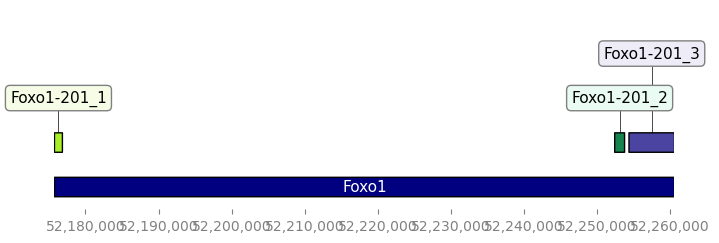

In [19]:
mouse.annotations.with_gene_name_contains("Foxo1").genes_visual(mouse.genome)[0].plot()

# Other genomes
If you want to get custom Ensembl assembly, you can initialize it yourself.
We use genopy under the hood to do download and search
For example let's select on of cow genomes

In [20]:
cow_assemblies = genomes.search_assemblies("Bos taurus")
cow_assemblies

[('UOA_Angus_1',
  'GCA_003369685.2',
  30522,
  True,
  'Bos indicus x Bos taurus',
  '2018-12-Ensembl/2019-03'),
 ('UOA_Brahman_1',
  'GCA_003369695.2',
  30522,
  True,
  'Bos indicus x Bos taurus',
  '2018-12-Ensembl/2019-03'),
 ('ARS-UCD1.2',
  'GCA_002263795.2',
  9913,
  True,
  'Bos taurus',
  '2018-09-Ensembl/2018-11')]

In [21]:
cow1 = genomes.SpeciesInfo("Cow", cow_assemblies[-1][0])
cow1.annotations.annotations_df

seqname,source,feature,start,end,score,strand,frame,attribute,gene,gene_name,transcript_biotype,transcript,transcript_name,exon_number
str,str,str,u64,u64,str,cat,str,str,str,str,str,str,str,u64
"""1""","""ensembl""","""gene""",339070,350389,""".""","""-""",""".""","""gene_id ""ENSBT...","""ENSBTAG0000000...",null,null,null,null,null
"""1""","""ensembl""","""transcript""",339070,350389,""".""","""-""",""".""","""gene_id ""ENSBT...","""ENSBTAG0000000...",null,"""protein_coding...","""ENSBTAT0000000...",null,null
"""1""","""ensembl""","""exon""",350267,350389,""".""","""-""",""".""","""gene_id ""ENSBT...","""ENSBTAG0000000...",null,"""protein_coding...","""ENSBTAT0000000...",null,1
"""1""","""ensembl""","""CDS""",350267,350389,""".""","""-""","""0""","""gene_id ""ENSBT...","""ENSBTAG0000000...",null,"""protein_coding...","""ENSBTAT0000000...",null,1
"""1""","""ensembl""","""start_codon""",350387,350389,""".""","""-""","""0""","""gene_id ""ENSBT...","""ENSBTAG0000000...",null,"""protein_coding...","""ENSBTAT0000000...",null,1
"""1""","""ensembl""","""exon""",346602,346924,""".""","""-""",""".""","""gene_id ""ENSBT...","""ENSBTAG0000000...",null,"""protein_coding...","""ENSBTAT0000000...",null,2
"""1""","""ensembl""","""CDS""",346602,346924,""".""","""-""","""0""","""gene_id ""ENSBT...","""ENSBTAG0000000...",null,"""protein_coding...","""ENSBTAT0000000...",null,2
"""1""","""ensembl""","""exon""",342547,342721,""".""","""-""",""".""","""gene_id ""ENSBT...","""ENSBTAG0000000...",null,"""protein_coding...","""ENSBTAT0000000...",null,3
"""1""","""ensembl""","""CDS""",342547,342721,""".""","""-""","""1""","""gene_id ""ENSBT...","""ENSBTAG0000000...",null,"""protein_coding...","""ENSBTAT0000000...",null,3


(<AxesSubplot: >,
 ({GF(FOXO1, 21900230-21991693 (1)): 0,
   GF(FOXO1-201_1, 21900230-21900960 ): 1.0,
   GF(FOXO1-201_2, 21901144-21901361 ): 1.0,
   GF(FOXO1-201_3, 21988870-21990226 ): 1.0,
   GF(FOXO1-201_4, 21990694-21991693 ): 1.0},
  {GF(FOXO1-201_3, 21988870-21990226 ): {'feature_y': 1.0,
    'annotation_y': 2.0},
   GF(FOXO1-201_4, 21990694-21991693 ): {'feature_y': 1.0,
    'annotation_y': 3.0},
   GF(FOXO1-201_1, 21900230-21900960 ): {'feature_y': 1.0,
    'annotation_y': 2.0},
   GF(FOXO1-201_2, 21901144-21901361 ): {'feature_y': 1.0,
    'annotation_y': 3.0}}))

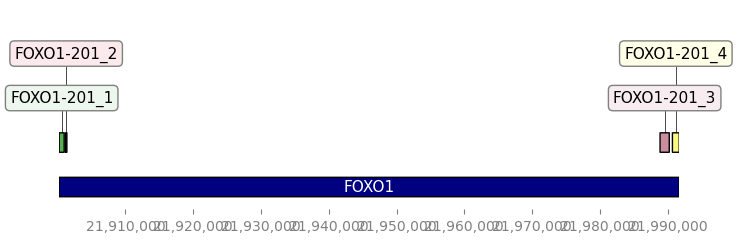

In [22]:
cow1.annotations.with_gene_name_contains("FOXO1").genes_visual(cow1.genome)[0].plot()

## Extend gene or transcript expression with feature and sequence information

In [ ]:
expressions = pl.read_parquet(str(data / "PRJNA543661_transcripts.parquet"))
expressions

In [ ]:
expressions_ext = mouse.annotations.extend_with_annotations_and_sequences(expressions, mouse.genome)
expressions_ext

# If we need to extend only with essential info and exons only

In [ ]:
expressions_ext_smaller = mouse.annotations.with_genes_transcripts_exons_coordinates_only().extend_with_annotations_and_sequences(expressions, mouse.genome)
expressions_ext_smaller